In [1]:
import sqlite3
import pandas as pd
import numpy as np
import geopandas as gpd
import fiona

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from sklearn import metrics

#### import version 1 gpkg to compare column names

In [2]:
urban_completeness = ("../global_urban_building_completeness.gpkg")
fiona.listlayers(urban_completeness)

['Europe & Central Asia_2022-01-01',
 'Sub-Saharan Africa_2022-01-01',
 'ne_10m_admin_0_countries',
 'graticule',
 'ne_50m_land',
 'all_parameters_urban_centers',
 'all_parameters_urban_centers_grid',
 'rf_adjusted_prediction_reference_and_osm',
 'rf_adjusted_prediction_reference_and_osm_urban_centers',
 'inequality_measures_urban_centers',
 'performance_20_clusters_reference_and_osm',
 'Europe & Central Asia_2010-01-01',
 'Europe & Central Asia_2014-01-01',
 'Europe & Central Asia_2023-01-01',
 'Sub-Saharan Africa_2010-01-01',
 'Sub-Saharan Africa_2014-01-01',
 'Sub-Saharan Africa_2023-01-01',
 'geowiki_grids_final',
 'rf_adjusted_prediction_reference_and_osm_urban_centers_v2024',
 'rf_adjusted_prediction_reference_and_osm_v2024',
 'performance_20_clusters_reference_and_osm_v2024',
 'model_performance_cluster_20_reference_and_osm',
 'osm_user_contributions_per_urban_center_with_data_teams_csv',
 'intra_urban_completeness_stats_clusters',
 'osm_user_contributions_per_urban_center_per_d

In [3]:
gdf1 = gpd.read_file(urban_completeness, layer="all_parameters_urban_centers")
pd.set_option('display.max_columns', None)
gdf1

,urban_center_id,name_main,iso_a3,country_id,continent,region_wb,total_area_sqkm,ghspop_2020,ghspop_2020_class,shdi_2019,shdi_2019_class,osm_building_area_sqkm_2023,osm_building_area_sqkm_2022,osm_building_area_sqkm_2021,osm_building_area_sqkm_2020,osm_building_area_sqkm_2019,osm_building_area_sqkm_2018,osm_building_area_sqkm_2017,osm_building_area_sqkm_2016,osm_building_area_sqkm_2015,osm_building_area_sqkm_2014,osm_building_area_sqkm_2013,osm_building_area_sqkm_2012,osm_building_area_sqkm_2011,osm_building_area_sqkm_2010,osm_building_area_sqkm_2009,osm_building_area_sqkm_2008,external_reference_building_area_sqkm,external_reference_sources,microsoft_building_area_sqkm,reference_building_area_sqkm,reference_building_area_sqkm_strict,reference_osm_completeness,reference_osm_completeness_strict,geowiki,geometry
0,3369,Ajdabiya,LBY,73,Africa,Middle East & North Africa,19.935750,50136.0,small urban areas,0.700,medium,0.225510,0.222118,0.222121,0.207653,0.197274,0.197274,0.322461,0.298798,0.162547,0.138866,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((20.23413 30.77126, 20.24510 30.77126..."
1,10716,Mengzi,CHN,10,Asia,East Asia & Pacific,27.871990,115875.0,small urban areas,0.672,medium,0.020891,0.014613,0.009319,0.009319,0.009319,0.009319,0.009319,0.063994,0.063994,0.063994,0.063994,0.063920,0.063920,0.063920,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((103.40718 23.38063, 103.41770 23.380..."
2,2,Papeete,PYF,191,Oceania,East Asia & Pacific,41.768459,76627.0,small urban areas,NaN,None,5.502946,5.498962,5.497647,5.492394,1.327908,1.241676,0.971373,0.918443,0.640816,0.450789,0.120853,0.087540,0.004019,0.004019,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-149.51221 -17.52587, -149.52249 -17..."
3,4417,Baalbek,LBN,13,Asia,Middle East & North Africa,15.958631,70800.0,small urban areas,0.718,high,0.039248,0.039248,0.039248,0.029666,0.029481,0.025165,0.018259,0.016982,0.016982,0.011637,0.001027,0.000000,0.000000,0.078191,0.078191,0.0,NaN,None,2.421252,2.421252,NaN,0.016210,0.016210,NaN,"POLYGON ((36.21625 34.01444, 36.23867 34.01444..."
4,9657,Kharagpur,IND,9,Asia,South Asia,53.743784,692966.0,metropolitan areas,0.641,medium,0.413584,0.425957,0.419152,0.417969,0.579934,0.566531,0.363138,0.352189,0.325166,0.026980,4.254766,4.254766,0.000000,0.000000,0.000000,0.0,NaN,None,6.268684,6.268684,NaN,0.065976,0.065976,NaN,"POLYGON ((87.34264 22.35427, 87.35311 22.35427..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13184,13186,Buin,PNG,160,Oceania,East Asia & Pacific,2.980550,4288.0,small urban areas,0.580,medium,0.033840,0.033181,0.032737,0.032737,0.022335,0.022335,0.022335,0.022335,0.022335,0.022335,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((155.70324 -6.75922, 155.69322 -6.759..."
13185,13187,Honiara,SLB,234,Oceania,East Asia & Pacific,22.854062,85539.0,small urban areas,0.557,medium,1.788077,1.779376,1.715076,1.697969,0.947213,0.873881,0.839629,0.751870,0.697281,0.004200,0.004200,0.004200,0.004200,0.000000,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((160.00675 -9.43852, 159.99669 -9.438..."
13186,13188,Nouméa,NCL,178,Oceania,East Asia & Pacific,26.870953,67497.0,small urban areas,NaN,None,3.509195,3.508410,3.498460,3.499012,3.396294,2.707484,2.452676,2.183220,2.152009,2.095669,1.350471,0.492710,0.151357,0.069027,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((166.48123 -22.26262, 166.47076 -22.2..."
13187,13189,Suva,FJI,176,Oceania,East Asia & Pacific,63.653669,206566.0,medium-size urban areas,0.743,high,5.446251,5.372963,5.067643,4.410355,0.346680,0.738412,0.146478,0.078797,0.074975,0.054583,0.027255,0.027255,0.027255,0.000000,0.000000,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((178.50540 -18.05327, 178.51570 -18.0..."


In [4]:
gdf2 = gpd.read_file(urban_completeness, layer="performance_20_clusters_reference_and_osm")

#### import version 2 (2024-05) to compare column names

In [5]:
uc_layers = ("../global_urban_building_completeness.gpkg")
fiona.listlayers(uc_layers)

['Europe & Central Asia_2022-01-01',
 'Sub-Saharan Africa_2022-01-01',
 'ne_10m_admin_0_countries',
 'graticule',
 'ne_50m_land',
 'all_parameters_urban_centers',
 'all_parameters_urban_centers_grid',
 'rf_adjusted_prediction_reference_and_osm',
 'rf_adjusted_prediction_reference_and_osm_urban_centers',
 'inequality_measures_urban_centers',
 'performance_20_clusters_reference_and_osm',
 'Europe & Central Asia_2010-01-01',
 'Europe & Central Asia_2014-01-01',
 'Europe & Central Asia_2023-01-01',
 'Sub-Saharan Africa_2010-01-01',
 'Sub-Saharan Africa_2014-01-01',
 'Sub-Saharan Africa_2023-01-01',
 'geowiki_grids_final',
 'rf_adjusted_prediction_reference_and_osm_urban_centers_v2024',
 'rf_adjusted_prediction_reference_and_osm_v2024',
 'performance_20_clusters_reference_and_osm_v2024',
 'model_performance_cluster_20_reference_and_osm',
 'osm_user_contributions_per_urban_center_with_data_teams_csv',
 'intra_urban_completeness_stats_clusters',
 'osm_user_contributions_per_urban_center_per_d

In [6]:
#same layer name benni original & version 2
uc_l1 = gpd.read_file(uc_layers, layer="performance_20_clusters_reference_and_osm_v2024")

In [7]:
# equivalent to bennis all_parameters_urban_centers layer
uc_l2 = gpd.read_file(uc_layers, layer="rf_adjusted_prediction_reference_and_osm_urban_centers_v2024")

In [8]:
pd.set_option('display.max_columns', None)
uc_l2

,urban_center_id,ghs_pop_2023,worldcover_2021_built_up_sqkm,worldcover_2021_tree_cover_sqkm,worldcover_2021_sparse_vegetation_sqkm,selected_road_length_km,reference_building_area_sqkm,prediction,osm_building_area_sqkm_2008_01,osm_building_area_sqkm_2009_01,osm_building_area_sqkm_2010_01,osm_building_area_sqkm_2011_01,osm_building_area_sqkm_2012_01,osm_building_area_sqkm_2013_01,osm_building_area_sqkm_2014_01,osm_building_area_sqkm_2015_01,osm_building_area_sqkm_2016_01,osm_building_area_sqkm_2017_01,osm_building_area_sqkm_2018_01,osm_building_area_sqkm_2019_01,osm_building_area_sqkm_2020_01,osm_building_area_sqkm_2021_01,osm_building_area_sqkm_2022_01,osm_building_area_sqkm_2023_01,osm_building_area_sqkm_2024_01,osm_building_area_sqkm_2024_05,shdi_2021,vnl_2023,prediction_osm_completeness_2008_01,prediction_osm_completeness_2009_01,prediction_osm_completeness_2010_01,prediction_osm_completeness_2011_01,prediction_osm_completeness_2012_01,prediction_osm_completeness_2013_01,prediction_osm_completeness_2014_01,prediction_osm_completeness_2015_01,prediction_osm_completeness_2016_01,prediction_osm_completeness_2017_01,prediction_osm_completeness_2018_01,prediction_osm_completeness_2019_01,prediction_osm_completeness_2020_01,prediction_osm_completeness_2021_01,prediction_osm_completeness_2022_01,prediction_osm_completeness_2023_01,prediction_osm_completeness_2024_01,prediction_osm_completeness_2024_05,total_area_sqkm,reference_osm_completeness_2024_05,region_wb,iso_a3,ghs_pop_2023_class,shdi_2021_class,geometry
0,1,60043,5.988389,12.555578,0.027807,159.73268,0.000000,2.324382,0.0,0.0,0.000000,0.000000,0.062051,0.273118,0.291588,0.299160,0.344058,0.366325,0.370777,0.475503,0.561869,0.631707,0.665965,1.520192,1.559349,1.568521,0.707,4.351451,0.0,0.0,0.000000,0.000000,0.063767,0.163730,0.166716,0.171311,0.188576,0.202116,0.203699,0.237329,0.264390,0.313722,0.336734,0.720924,0.744398,0.747106,34.792,NaN,East Asia & Pacific,WSM,small urban areas,high,"MULTIPOLYGON (((-171.77356 -13.82480, -171.763..."
1,2,51992,5.915353,2.544346,0.065721,144.96438,0.000000,1.843358,0.0,0.0,0.000000,0.000000,0.003224,0.003370,0.027491,0.307089,1.425560,1.426726,1.424854,1.626145,1.625575,1.628737,1.629207,1.633950,1.641720,1.685883,0.745,4.939129,0.0,0.0,0.000000,0.000000,0.000822,0.000883,0.018637,0.152596,0.783101,0.783734,0.783273,0.901063,0.900828,0.901067,0.902121,0.904437,0.907950,0.935053,19.901,NaN,East Asia & Pacific,TON,small urban areas,high,"MULTIPOLYGON (((-175.19374 -21.13139, -175.172..."
2,3,53721,7.765687,1.549071,0.245182,134.50359,1.670102,1.831028,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037462,0.045946,0.099080,0.084206,0.139549,0.139863,0.141995,0.940,14.999293,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015071,0.020622,0.048817,0.043124,0.077236,0.077356,0.079047,14.926,0.085,North America,USA,small urban areas,very high,"MULTIPOLYGON (((-158.01943 21.33908, -158.0090..."
3,4,109748,18.007347,13.902134,0.154894,512.06884,6.287605,6.101699,0.0,0.0,0.004019,0.004019,0.087540,0.144645,0.489777,0.688102,0.991739,1.034822,1.321985,1.410747,6.224363,6.229615,6.232344,6.238917,6.248434,6.287605,NaN,6.794596,0.0,0.0,0.000253,0.000253,0.006859,0.012942,0.132607,0.156795,0.207317,0.210715,0.250420,0.260357,1.020683,1.020921,1.018852,1.020911,1.025525,1.029091,49.725,1.000,East Asia & Pacific,PYF,small urban areas,very high,"MULTIPOLYGON (((-149.52669 -17.53410, -149.516..."
4,5,76707,16.166797,0.615121,2.574366,425.72589,3.203175,3.425973,0.0,0.0,0.119848,0.125242,0.125242,0.158166,0.157946,0.070825,0.078129,0.078476,0.079949,0.465726,0.465486,0.537753,0.567286,0.565102,0.567626,0.583113,0.788,23.702313,0.0,0.0,0.032486,0.033710,0.033710,0.044361,0.044296,0.018624,0.024147,0.024327,0.023059,0.132346,0.132319,0.145884,0.168810,0.168214,0.168644,0.172562,28.917,0.182,Latin America & Caribbean,MEX,small urban areas,high,"MULTIPOLYGON (((-117.04765 3

### adjust script 

In [9]:
#nach load data nichts verändert, da kein harter code mehr

In [10]:
def load_dataframe_avg_urban_centers():
    con = sqlite3.connect("../global_urban_building_completeness.gpkg")
    query = f"""
        with agg_prediction as (
            select
              a.identifier
              ,a.urban_center_id
              ,'rf_adjusted' as model_name
              ,split
              ,avg(a.prediction) as prediction
            from performance_20_clusters_reference_and_osm_v2024 as a 
            group by urban_center_id, identifier, split, model_name
        )
        select
          a.urban_center_id
          ,a.total_area_sqkm
          ,a.reference_osm_completeness_2024_05
          ,a.region_wb
          ,b.model_name
          ,b.split
          ,SUM(b.prediction) as sum_prediction_sqkm
          ,case
                when a.osm_building_area_sqkm_2024_05 / SUM(b.prediction) < 0 then 0
                when a.osm_building_area_sqkm_2024_05 / SUM(b.prediction) > 1.5 then 1.5
                else a.osm_building_area_sqkm_2024_05 / SUM(b.prediction)
            end as prediction_osm_completeness
        from rf_adjusted_prediction_reference_and_osm_urban_centers_v2024 a
        left join agg_prediction b
            on a.urban_center_id = b.urban_center_id
        where
            reference_building_area_sqkm is not null
            and
            reference_osm_completeness_2024_05 < 1.5
        group by
            a.urban_center_id
            ,reference_osm_completeness_2024_05
            ,b.model_name
            ,a.osm_building_area_sqkm_2024_05
            ,b.split
            ,a.region_wb
            ,a.total_area_sqkm
    """
    df = pd.read_sql_query(query, con=con)
    df.dropna(inplace=True)
    print(f"got dataframe with {len(df)} samples.")    
    return df


def get_all_samples():
    con = sqlite3.connect("../global_urban_building_completeness.gpkg")
    query = f"""
        select 
          a.identifier as id
          ,a.urban_center_id
          ,a.region_wb 
        from rf_adjusted_prediction_reference_and_osm_v2024 a
    """
    df = pd.read_sql(query, con=con)
    print(f"got dataframe with {len(df)} samples from table: rf_adjusted_prediction_reference_and_osm_v2024")
    return df

## Load data

In [11]:
model_name = "rf_adjusted"
split = "cluster_20"
training_data = "reference_and_osm"

avg_prediction_df = load_dataframe_avg_urban_centers()

df_all_samples = get_all_samples()

got dataframe with 7757 samples.
got dataframe with 677806 samples from table: rf_adjusted_prediction_reference_and_osm_v2024


## Create Scatterplot for residuals for urban centers

/tmp/ipykernel_17183/2200566900.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('tab10')


27      0.830
32      0.757
38      1.020
41      0.855
45      1.000
        ...  
6199    0.871
6207    0.902
6221    0.761
6239    1.000
6267    1.078
Name: reference_osm_completeness_2024_05, Length: 1376, dtype: float64 0.0 1.438
27      0.815030
32      0.922054
38      0.893098
41      1.136587
45      1.123000
          ...   
6199    0.784621
6207    0.828293
6221    0.645118
6239    1.011687
6267    0.792918
Name: prediction_osm_completeness, Length: 1376, dtype: float64 0.0 1.5


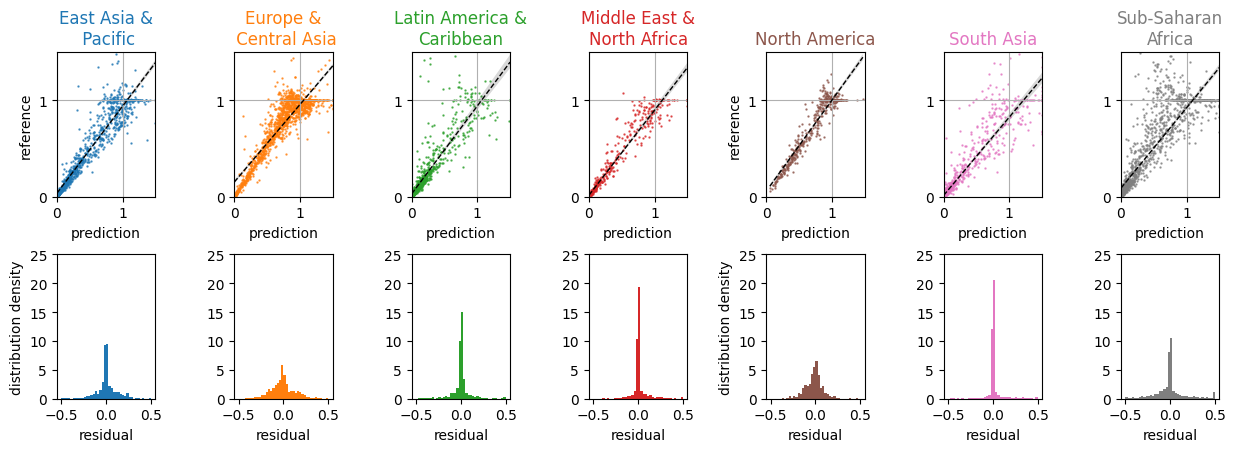

In [12]:
fig = plt.figure(figsize=(15, 4.5))
gs1 = gridspec.GridSpec(2, 7)
gs1.update(wspace=0.8, hspace=0.4) # set the spacing between axes.


titles = [
    "a)", "b)", "c)", "d)", "e)", "f)", "g)"
]

wb_regions_groups = [
    ["East Asia & Pacific"],
    ["Europe & Central Asia"],
    ["Latin America & Caribbean"],
    ["Middle East & North Africa"],
    ["North America"],
    ["South Asia"],
    ["Sub-Saharan Africa"],
]
label_strings = [
    "East Asia &\n Pacific",
    "Europe &\n Central Asia",
    "Latin America &\nCaribbean",
    "Middle East &\nNorth Africa",
    "North America",
    "South Asia",
    "Sub-Saharan\nAfrica",
    "all"
]

cmap = matplotlib.cm.get_cmap('tab10')
colors_dict = {
    "East Asia & Pacific": cmap(0),
    "Europe & Central Asia": cmap(0.125),
    "Latin America & Caribbean": cmap(0.25),
    "Middle East & North Africa": cmap(0.375),
    "North America": cmap(0.5),
    "South Asia": cmap(0.625),
    "Sub-Saharan Africa": cmap(0.75),
    "all": "black",
}

all_handles = []
all_labels = []
for i, wb_regions in enumerate(wb_regions_groups):
    y_test = avg_prediction_df.loc[
        (avg_prediction_df["region_wb"].isin(wb_regions))
        &
        (avg_prediction_df["model_name"] == model_name) 
    ]["reference_osm_completeness_2024_05"]

    y_pred = avg_prediction_df.loc[
        avg_prediction_df["region_wb"].isin(wb_regions)
        &
        (avg_prediction_df["model_name"] == model_name)
    ]["prediction_osm_completeness"]
    
    weights = avg_prediction_df.loc[
        avg_prediction_df["region_wb"].isin(wb_regions)
        &
        (avg_prediction_df["model_name"] == model_name)
    ]["total_area_sqkm"]

    samples = len(df_all_samples.loc[
        df_all_samples["region_wb"].isin(wb_regions)
    ])
    if i == 1:
        print(y_test, min(y_test), max(y_test))
        print(y_pred, min(y_pred), max(y_pred))
    
    
    ax1 = plt.subplot(gs1[i])  # top
    ax2 = plt.subplot(gs1[i + 7])  # bottom
    
    limit = 0.6
    
    sns.regplot(
        x=y_pred,
        y=y_test,
        ax=ax1,
        scatter_kws={
            "s":0.5,
            "alpha":0.75,
            "color":colors_dict[wb_regions[0]]
        },
        line_kws={
            "linestyle":'--',
            "linewidth": 1.0,
            "color":"black"
        },
        ci=95
    )
    ax1.set_xlim([0, 1.5])
    ax1.set_xlabel("prediction")
        
    ax1.set_ylim([0.0, 1.5])
    ax1.set_yticks([0, 1])
    ax1.set_yticklabels([0,1])
    ax1.grid()
    
    if i in [0, 4]:
        ax1.set_ylabel("reference")
    else:
        ax1.set_ylabel("")
    ax1.set_title(label_strings[i], color=colors_dict[wb_regions[0]])

    ax2.hist(
        y_pred - y_test,
        bins=40,
        #weights=weights,
        range=[-0.5, 0.5],
        density=True,
        color=colors_dict[wb_regions[0]],
        label=label_strings[i]
    )
    ax2.set_ylim([0, 25])
    if i in [0, 4]:
            ax2.set_ylabel("distribution density")
    else:
        ax2.set_ylabel("")
    ax2.set_xlabel("residual")
    
plt.savefig(
    f"../figures/performance_by_region_{model_name}_{split}_urban_centers.pdf",
    dpi=300,
    bbox_inches = 'tight',
    pad_inches = 0.25
)
plt.show()

## regional performance scores urban center level (for Table 5)

In [13]:
models = [
    "rf_adjusted",
]
splits = [
    "cluster_20",
]

score_names = [
    ['r2', metrics.r2_score],
    ['explained_variance', metrics.explained_variance_score],
    ['neg_mean_squared_error', metrics.mean_squared_error],
    ['neg_mean_absolute_error', metrics.mean_absolute_error],
]

training_data_sets = [
    "reference_and_osm"
]

wb_regions_groups = [
    ["Latin America & Caribbean"],
    ["East Asia & Pacific"],
    ["South Asia"],
    ["Europe & Central Asia"],
    ["North America"],
    ["Middle East & North Africa"],
    ["Sub-Saharan Africa"],
]

In [14]:
results_list = []
results = {}

for split in splits:
    results[split] = {}
    for training_data in training_data_sets:
        results[split][training_data] = {}
        avg_prediction_df = load_dataframe_avg_urban_centers()
        
        for model_name in models:
            print(model_name)
            results[split][training_data][model_name] = {}
            results[split][training_data][model_name]["samples"] = []
            results[split][training_data][model_name]["reference_samples"] = []
            for score_name, score_function in score_names:
                results[split][training_data][model_name][score_name] = []
            
            for i, wb_regions in enumerate(wb_regions_groups):
                y_test = avg_prediction_df.loc[
                    (avg_prediction_df["region_wb"].isin(wb_regions))
                    &
                    (avg_prediction_df["model_name"] == model_name) 
                ]["reference_osm_completeness_2024_05"]

                y_pred = avg_prediction_df.loc[
                    avg_prediction_df["region_wb"].isin(wb_regions)
                    &
                    (avg_prediction_df["model_name"] == model_name)
                ]["prediction_osm_completeness"]
                
                weights = avg_prediction_df.loc[
                    avg_prediction_df["region_wb"].isin(wb_regions)
                    &
                    (avg_prediction_df["model_name"] == model_name)
                ]["total_area_sqkm"]
                
                if len(y_test) < 1:
                    print(f"no test samples for {wb_regions}")
                    continue
                
                samples = len(df_all_samples.loc[
                    df_all_samples["region_wb"].isin(wb_regions)
                ])
                
                reference_samples = len(y_test)
                
                results[split][training_data][model_name]["samples"].append(samples)
                results[split][training_data][model_name]["reference_samples"].append(reference_samples)

                for score_name, score in score_names:
                    val = score(
                        y_test,
                        y_pred,
                        #sample_weight=weights
                    )
                    results[split][training_data][model_name][score_name].append(val)

            # get weighted average global score
            list_item = [training_data, model_name, split]
            samples = results[split][training_data][model_name]["samples"]
            
            print(samples)
            print(sum(samples))
            
            reference_samples = results[split][training_data][model_name]["reference_samples"]
            print(reference_samples)
            print(sum(reference_samples))
            
            for score_name, score in score_names:
                vals = results[split][training_data][model_name][score_name]
                avg_score = np.average(
                    vals,
                    weights=samples
                )
                list_item.append(avg_score)
            results_list.append(list_item)
        
columns = [
    "training_data",
    "model_name",
    "split",
    "r2",
    "explained_variance",
    "MSE",
    "MAE"
]
list_df = pd.DataFrame(results_list, columns=columns)
display(list_df.sort_values("model_name", ascending=False))  


got dataframe with 7757 samples.
rf_adjusted
[65549, 207618, 127334, 90835, 70115, 44219, 72136]
677806
[939, 1042, 1781, 1376, 397, 794, 1428]
7757


,training_data,model_name,split,r2,explained_variance,MSE,MAE
0,reference_and_osm,rf_adjusted,cluster_20,0.835506,0.836939,0.018725,0.073298


In [15]:
for split in splits:
    for model_name in [
        "rf_adjusted",
    ]:
        results_list_regions = []
        for i, wb_region in enumerate(wb_regions_groups):
            results_list_regions.append([
                model_name,
                wb_region,
                split,
                results[split]["reference_and_osm"][model_name]["samples"][i],
                results[split]["reference_and_osm"][model_name]["reference_samples"][i],
                results[split]["reference_and_osm"][model_name]["r2"][i],
                results[split]["reference_and_osm"][model_name]["explained_variance"][i],
                results[split]["reference_and_osm"][model_name]["neg_mean_squared_error"][i],
                results[split]["reference_and_osm"][model_name]["neg_mean_absolute_error"][i],
            ])


        columns = [
            "model_name",
            "region",
            "split",
            "samples",
            "reference_samples",
            "r2",
            "explained_variance",
            "MSE",
            "MAE"
        ]
        list_df = pd.DataFrame(results_list_regions, columns=columns)
        display(list_df.sort_values("region", ascending=True))

,model_name,region,split,samples,reference_samples,r2,explained_variance,MSE,MAE
1,rf_adjusted,[East Asia & Pacific],cluster_20,207618,1042,0.888620,0.888937,0.015967,0.073877
3,rf_adjusted,[Europe & Central Asia],cluster_20,90835,1376,0.753282,0.753679,0.023302,0.108071
0,rf_adjusted,[Latin America & Caribbean],cluster_20,65549,939,0.783814,0.784504,0.019640,0.060427
5,rf_adjusted,[Middle East & North Africa],cluster_20,44219,794,0.923110,0.924392,0.007958,0.037453
4,rf_adjusted,[North America],cluster_20,70115,397,0.887764,0.891153,0.010326,0.072835
2,rf_adjusted,[South Asia],cluster_20,127334,1781,0.825174,0.828024,0.012381,0.038803
6,rf_adjusted,[Sub-Saharan Africa],cluster_20,72136,1428,0.746885,0.749210,0.046025,0.122853
